# Handling imbalanced data

### Imbalanced data is a common problem in machine learning, which brings challenges to feature correlation, class separation and evaluation, and results in poor model performance.

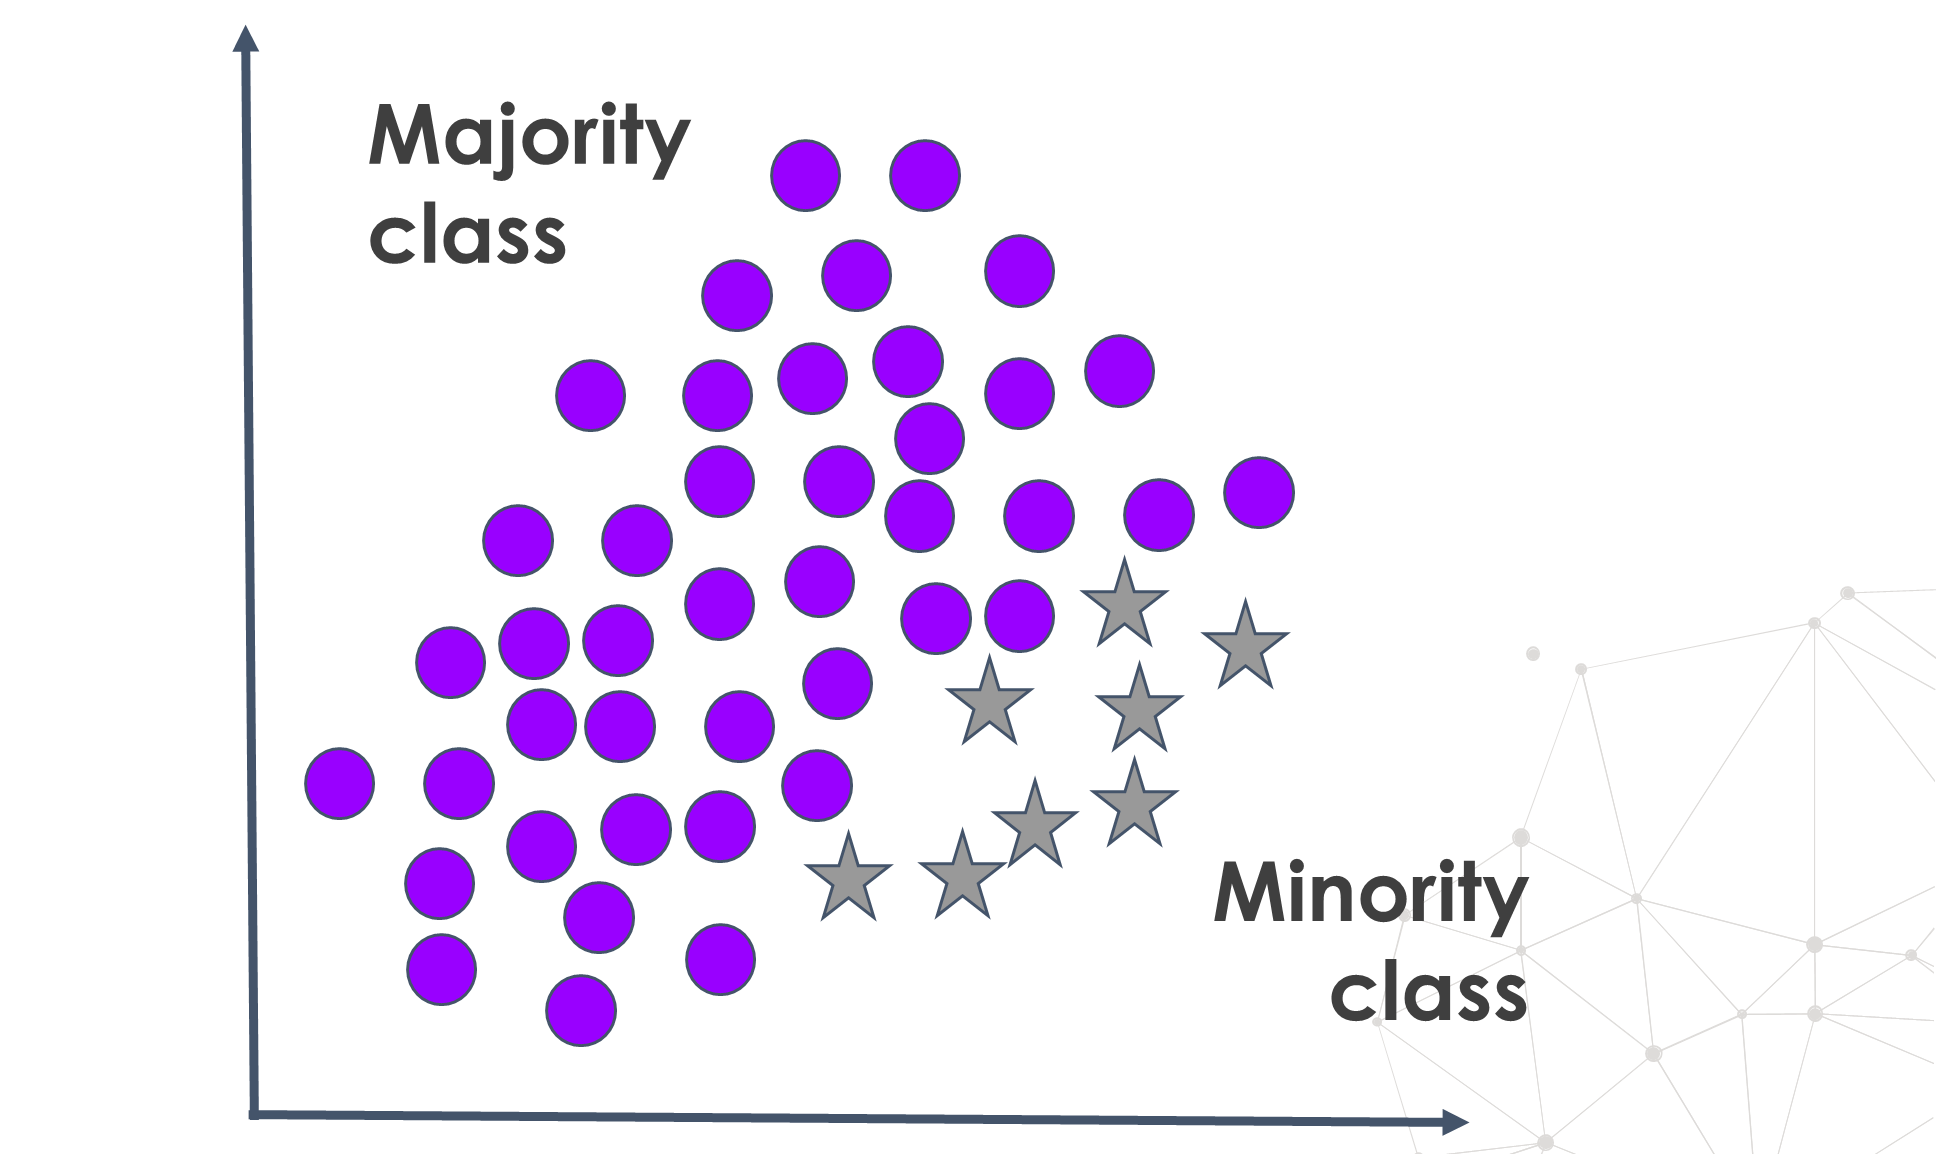

### An imbalanced dataset is a dataset where the distribution of classes is not equal. For example, in a binary classification problem, if one class has only a few instances while the other class has a large number of instances, then the dataset is imbalanced. The same can happen with multi-class classification problems, where one or more classes have a significantly smaller number of instances than the others. Imbalanced datasets are common in many domains, including fraud detection, medical diagnosis, and anomaly detection.


# we first introduce some notations:

## The majority class is the class with the highest number of samples.
## The minority class is the class with the lowest number of samples.

- The class ratio for a given dataset is defined as the ratio between the size of the minority class and the size of the majority class.
- Empirically, data ratios of at least 25% do not affect performance by large margins. This is no longer true, however, as the ratio becomes smaller.

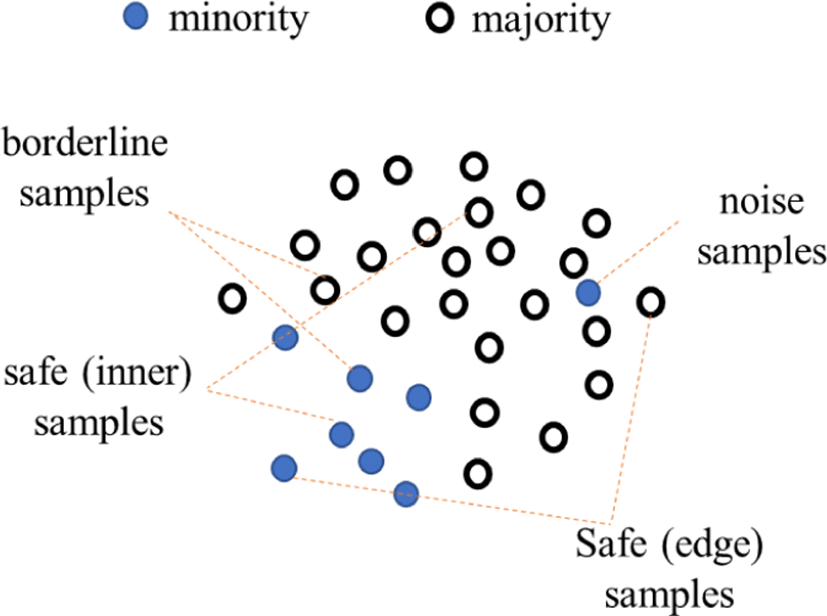

# sampling techniques to handle imbalanced data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns

## before Sampling techniques ,if you want see EDA , Cleaning and Data Visualization for this data Through this lik:
##### https://www.kaggle.com/code/fatmayousufmohamed/heart-disease-eda

In [2]:
df= pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv', sep= ',' , encoding= ' utf-8')

In [3]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.duplicated().sum()

18078

In [6]:
df.drop_duplicates()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [7]:
df.dropna(inplace=True)

# Our target is HeartDisease !



In [8]:
da2=df['HeartDisease'].value_counts().reset_index(name='count')
da2

,HeartDisease,count
0,No,292422
1,Yes,27373


([<matplotlib.patches.Wedge at 0x78e8609d56f0>,
 [Text(-1.0604682899620466, 0.2922447706717311, 'No'),
  Text(1.0604682626001118, -0.2922448699599368, 'Yes')],
 [Text(-0.5784372490702072, 0.15940623854821695, '91%'),
  Text(0.5784372341455155, -0.15940629270542006, '9%')])

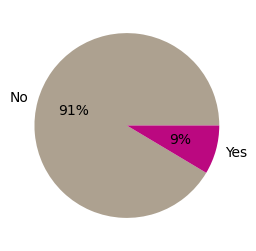

In [9]:
plt.figure(figsize = (3,3))
plt.pie(da2['count'], labels=['No','Yes'], colors=["#ADA190","#BB0880"], autopct='%.0f%%')

# To predict that person if he have heartdisease or no .

## Encoder

In [10]:
data1=df.copy()
le = LabelEncoder()
le.fit(data1['HeartDisease'])
data1['HeartDisease']=le.transform(data1['HeartDisease'])

le.fit(data1['Smoking'])
data1['Smoking']=le.transform(data1['Smoking'])

le.fit(data1['AlcoholDrinking'])
data1['AlcoholDrinking']=le.transform(data1['AlcoholDrinking'])

le.fit(data1['Stroke'])
data1['Stroke']=le.transform(data1['Stroke'])

le.fit(data1['DiffWalking'])
data1['DiffWalking']=le.transform(data1['DiffWalking'])

le.fit(data1['Sex'])
data1['Sex']=le.transform(data1['Sex'])

le.fit(data1['AgeCategory'])
data1['AgeCategory']=le.transform(data1['AgeCategory'])

le.fit(data1['Race'])
data1['Race']=le.transform(data1['Race'])

le.fit(data1['Diabetic'])
data1['Diabetic']=le.transform(data1['Diabetic'])


le.fit(data1['PhysicalActivity'])
data1['PhysicalActivity']=le.transform(data1['PhysicalActivity'])

le.fit(data1['GenHealth'])
data1['GenHealth']=le.transform(data1['GenHealth'])

le.fit(data1['Asthma'])
data1['Asthma']=le.transform(data1['Asthma'])

le.fit(data1['KidneyDisease'])
data1['KidneyDisease']=le.transform(data1['KidneyDisease'])

le.fit(data1['SkinCancer'])
data1['SkinCancer']=le.transform(data1['SkinCancer'])

## Correlation

<Axes: >

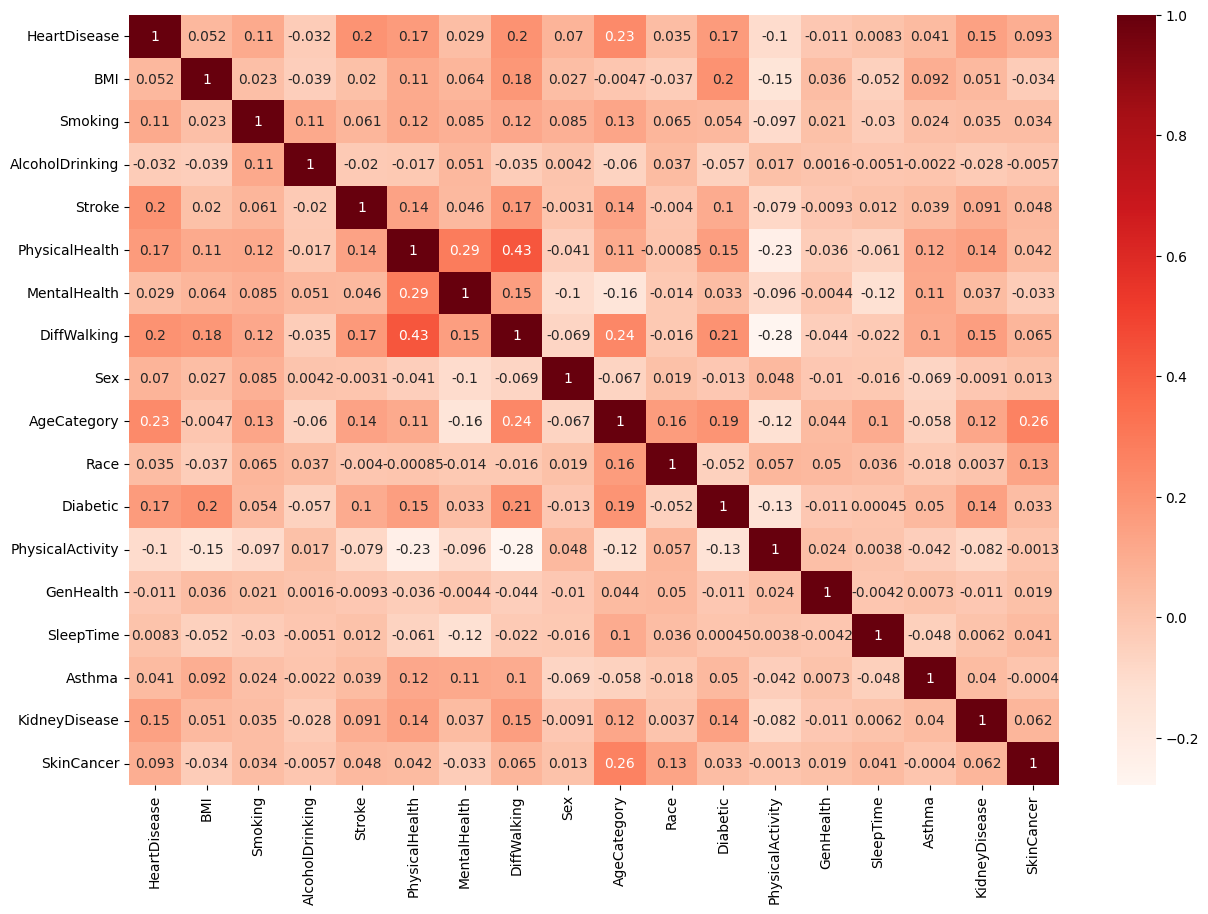

In [11]:
plt.figure(figsize = (15,10))
sns.heatmap(data1.corr(),annot = True,cmap='Reds')

## VIF

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
#data32.drop(['Height',"Weight"],axis=1,inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = data1.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data1.values, i)
                          for i in range(len(data1.columns))]
print(vif_data)

             feature        VIF
0       HeartDisease   1.257432
1                BMI  15.210559
2            Smoking   1.823454
3    AlcoholDrinking   1.100421
4             Stroke   1.116905
5     PhysicalHealth   1.599487
6       MentalHealth   1.438003
7        DiffWalking   1.637004
8                Sex   1.978236
9        AgeCategory   5.688295
10              Race  12.982119
11          Diabetic   1.338435
12  PhysicalActivity   4.595669
13         GenHealth   3.087401
14         SleepTime  16.772639
15            Asthma   1.202385
16     KidneyDisease   1.101811
17        SkinCancer   1.198668


## splite

In [14]:

from sklearn.model_selection import train_test_split

In [15]:
x = data1.drop(["HeartDisease"] , axis = 1).values
y = data1["HeartDisease"].values

In [16]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

## scalar

In [17]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

In [18]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

# Decision Tree Without Imbalanced Technique

## grid search

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

pram_grid = {"max_depth": [2,3,4] , 'max_features': [3,4,5,6,7] }
clf = DecisionTreeClassifier()
grid = GridSearchCV(estimator= clf , param_grid= pram_grid , cv = 5 )
grid_result = grid.fit(x_train , y_train)

print(grid_result)
print ("Best: %f using %s" %(grid_result.best_score_ , grid_result.best_params_))


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'max_features': [3, 4, 5, 6, 7]})
Best: 0.915321 using {'max_depth': 4, 'max_features': 6}


In [20]:
dt = DecisionTreeClassifier(max_depth= 4, max_features=5 )

In [21]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=5)

In [22]:
y_pred=dt.predict(x_test)

In [23]:
print("Train Score : ",dt.score(x_train,y_train)," Test Score : ",dt.score(x_test,y_test))

Train Score :  0.9154540830366151  Test Score :  0.9135699008117675


In [24]:
accuracy_score(y_test, y_pred)*100

91.35699008117675

# Evaluation for DT with out Handling Imbalanced Data

In [25]:
from sklearn.metrics import confusion_matrix , classification_report

In [26]:
con = confusion_matrix(y_test , y_pred )
con

array([[72735,   269],
       [ 6641,   304]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

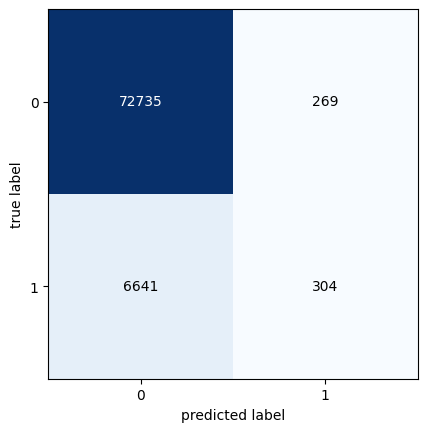

In [27]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(con )


In [28]:
print (classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     73004
           1       0.53      0.04      0.08      6945

    accuracy                           0.91     79949
   macro avg       0.72      0.52      0.52     79949
weighted avg       0.88      0.91      0.88     79949



# Techniques to Convert Imbalanced Dataset into Balanced Dataset With DT

### Imbalanced data is not always a bad thing, and in real data sets, there is always some degree of imbalance. That said, there should not be any big impact on your model performance if the level of imbalance is relatively low.

# 1) Random Oversampling with Evaluation

### Over-sampling increases the number of minority class members in the training set. The advantage of over-sampling is that no information from the original training set is lost, as all observations from the minority and majority classes are kept. On the other hand, it is prone to over fitting.

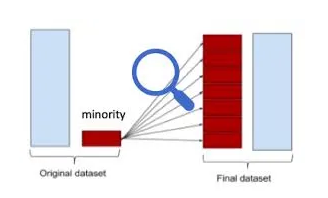

In [29]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_ros, y_ros, test_size=0.25, random_state=42)
dt1=DecisionTreeClassifier( )
dt1.fit(x_train1,y_train1)
print("Train Score : ",dt1.score(x_train1,y_train1)," Test Score : ",dt1.score(x_test1,y_test1))
y_pred1=dt1.predict(x_test1)
print("accuracy :" , accuracy_score(y_test1, y_pred1)*100)
print(x_train1.shape,y_train1.shape)

Train Score :  0.9966030827593911  Test Score :  0.952513832748562
accuracy : 95.25138327485621
(438633, 17) (438633,)


In [30]:
con = confusion_matrix(y_test1 , y_pred1)
con

array([[66232,  6880],
       [   63, 73036]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

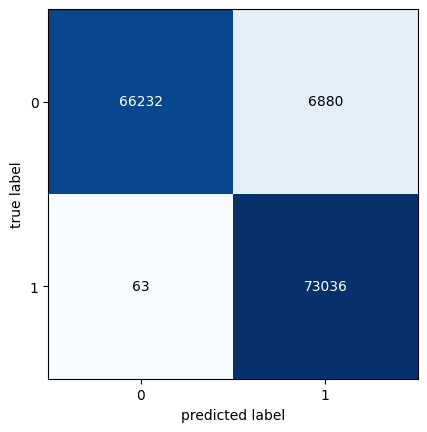

In [31]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(con )

In [32]:
print (classification_report(y_test1 , y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     73112
           1       0.91      1.00      0.95     73099

    accuracy                           0.95    146211
   macro avg       0.96      0.95      0.95    146211
weighted avg       0.96      0.95      0.95    146211



## 1.1) With SMOTE (Synthetic Minority Oversampling Technique) with Evaluation

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_smote, y_smote= sm.fit_resample(x, y)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_smote, y_smote, test_size=0.25, random_state=42)
dt2=DecisionTreeClassifier()
dt2.fit(x_train2,y_train2)
print("Train Score : ",dt2.score(x_train2,y_train2)," Test Score : ",dt2.score(x_test2,y_test2))
y_pred2=dt2.predict(x_test2)
print("accuracy :" , accuracy_score(y_test2, y_pred2)*100)
print(x_train2.shape,y_train2.shape)

Train Score :  0.9982513855546664  Test Score :  0.9143156123684264
accuracy : 91.43156123684264
(438633, 17) (438633,)


In [34]:
con = confusion_matrix(y_test2 , y_pred2 )
con

array([[66703,  6409],
       [ 6119, 66980]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

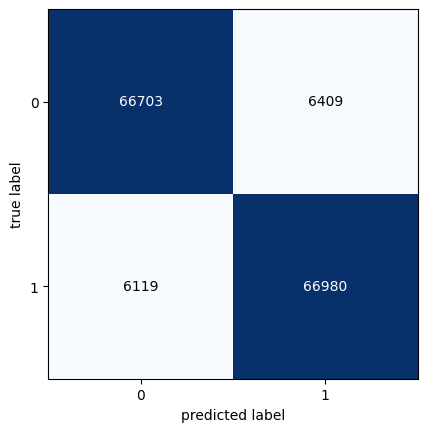

In [35]:
plot_confusion_matrix(con )

In [36]:
print (classification_report(y_test2 , y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     73112
           1       0.91      0.92      0.91     73099

    accuracy                           0.91    146211
   macro avg       0.91      0.91      0.91    146211
weighted avg       0.91      0.91      0.91    146211



## 1.2) ADASYN Random over-sampling Evaluation

In [37]:
from imblearn.over_sampling import ADASYN
x_AD, y_AD = ADASYN(random_state=42).fit_resample(x, y)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_AD, y_AD, test_size=0.25, random_state=42)
dt3=DecisionTreeClassifier()
dt3.fit(x_train3,y_train3)
print("Train Score : ",dt3.score(x_train3,y_train3)," Test Score : ",dt3.score(x_test3,y_test3))
y_pred3=dt3.predict(x_test3)
print("accuracy :" , accuracy_score(y_test3, y_pred3)*100)
print(x_train3.shape,y_train3.shape)

Train Score :  0.9982532175777648  Test Score :  0.9157938492780091
accuracy : 91.57938492780092
(440238, 17) (440238,)


In [38]:
con = confusion_matrix(y_test3 , y_pred3 )
con


array([[66804,  6381],
       [ 5976, 67586]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

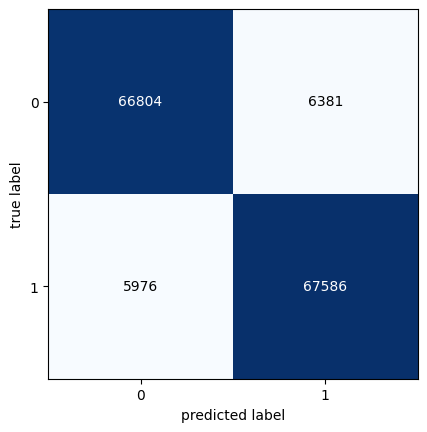

In [39]:
plot_confusion_matrix(con )


In [40]:
print (classification_report(y_test3 , y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     73185
           1       0.91      0.92      0.92     73562

    accuracy                           0.92    146747
   macro avg       0.92      0.92      0.92    146747
weighted avg       0.92      0.92      0.92    146747



# 2) Random Under-Sampling With Evaluation

### Under-sampling, on contrary to over-sampling, aims to reduce the number of majority samples to balance the class distribution. Since it is removing observations from the original data set, it might discard useful information.



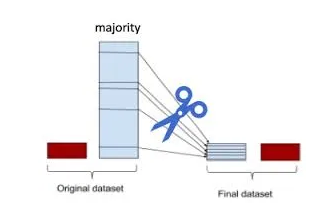

In [41]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x, y)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_rus, y_rus, test_size=0.25, random_state=42)
dt4=DecisionTreeClassifier()
dt4.fit(x_train4,y_train4)
print("Train Score : ",dt4.score(x_train4,y_train4)," Test Score : ",dt4.score(x_test4,y_test4))
y_pred4=dt4.predict(x_test4)
print("accuracy :" , accuracy_score(y_test4, y_pred4)*100)
print(x_train4.shape,y_train4.shape)

Train Score :  0.9972478628315351  Test Score :  0.6699788120113976
accuracy : 66.99788120113976
(41059, 17) (41059,)


In [42]:
con = confusion_matrix(y_test4 , y_pred4 )
con


array([[4635, 2190],
       [2327, 4535]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

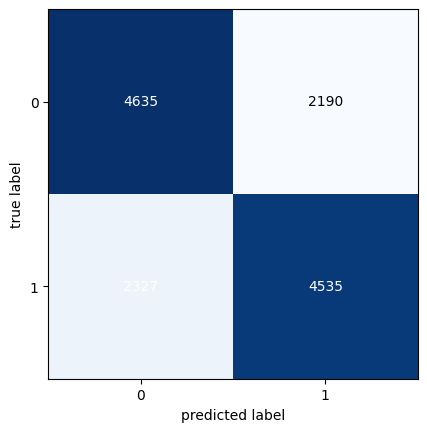

In [43]:
plot_confusion_matrix(con )


In [44]:
print (classification_report(y_test4 , y_pred4))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      6825
           1       0.67      0.66      0.67      6862

    accuracy                           0.67     13687
   macro avg       0.67      0.67      0.67     13687
weighted avg       0.67      0.67      0.67     13687



## 2.1) With Near Miss Under-Sampling With Evaluation


In [45]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
x_NM, y_NM = nr.fit_resample(x, y)
x_train5, x_test5, y_train5, y_test5 = train_test_split(x_NM, y_NM, test_size=0.25, random_state=42)
dt5=DecisionTreeClassifier()
dt5.fit(x_train5,y_train5)
print("Train Score : ",dt5.score(x_train5,y_train5)," Test Score : ",dt5.score(x_test5,y_test5))
y_pred5=dt5.predict(x_test5)
print("accuracy :" , accuracy_score(y_test5, y_pred5)*100)
print(x_train5.shape,y_train5.shape)

Train Score :  0.9830731386541318  Test Score :  0.8417476437495434
accuracy : 84.17476437495434
(41059, 17) (41059,)


In [46]:
con = confusion_matrix(y_test5 , y_pred5 )
con


array([[5811, 1014],
       [1152, 5710]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

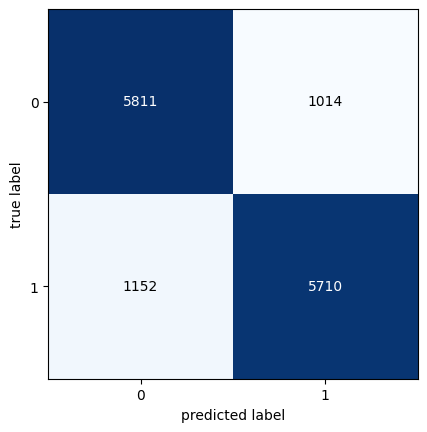

In [47]:
plot_confusion_matrix(con )


In [48]:
print (classification_report(y_test5 , y_pred5))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      6825
           1       0.85      0.83      0.84      6862

    accuracy                           0.84     13687
   macro avg       0.84      0.84      0.84     13687
weighted avg       0.84      0.84      0.84     13687



# 3) Ensemble Learning Techniques with Evaluation

###  This method modifies the generalisation ability of individual classifiers by assembling various classifiers. It mainly combines the outputs of multiple base learners. There are various approaches in ensemble learning such as Bagging, Boosting, etc.

### Advantages

- This is a more stable model
- The prediction is better

## 3.1 ) Bagging classifier

#### bagging methods build several estimators on different randomly selected subset of data. However, this classifier does not allow to balance each subset of data. Therefore, when training on imbalanced data set, this classifier will favor the majority classes

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
bc.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [50]:
y_pred=bc.predict(x_test)

In [51]:
accuracy_score(y_test, y_pred)*100

90.25128519431136

In [52]:
con = confusion_matrix(y_test , y_pred )
con


array([[71278,  1726],
       [ 6068,   877]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

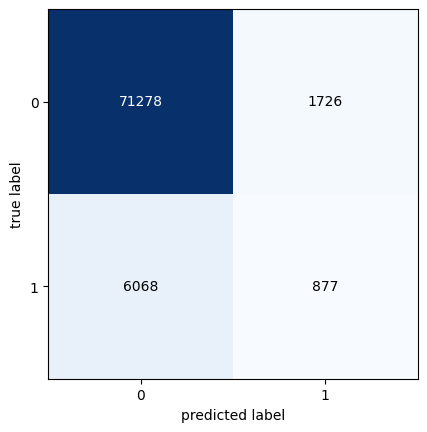

In [53]:
plot_confusion_matrix(con )


In [54]:
print (classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     73004
           1       0.34      0.13      0.18      6945

    accuracy                           0.90     79949
   macro avg       0.63      0.55      0.57     79949
weighted avg       0.87      0.90      0.88     79949



## 3.2) Boosting

In [55]:
from imblearn.ensemble import RUSBoostClassifier
rusboost = RUSBoostClassifier(n_estimators=100, algorithm='SAMME.R',random_state=42)
rusboost.fit(x_train, y_train)
y_pred = rusboost.predict(x_test)
accuracy_score(y_test, y_pred)*100

74.83645824212935

In [56]:
con = confusion_matrix(y_test , y_pred )
con


array([[54430, 18574],
       [ 1544,  5401]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

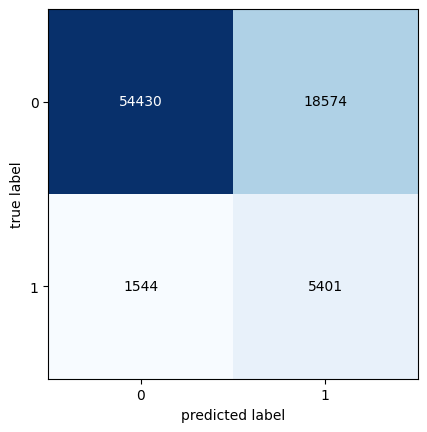

In [57]:
plot_confusion_matrix(con )


In [58]:
print (classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     73004
           1       0.23      0.78      0.35      6945

    accuracy                           0.75     79949
   macro avg       0.60      0.76      0.60     79949
weighted avg       0.91      0.75      0.80     79949



## 3.3) Forest of randomized trees

In [59]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier( random_state=0, sampling_strategy="all", replacement=True)
brf.fit(x_train, y_train)
y_pred = brf.predict(x_test)

In [60]:
accuracy_score(y_test, y_pred)*100

76.43998048756082

In [61]:
con = confusion_matrix(y_test , y_pred )
con


array([[56078, 16926],
       [ 1910,  5035]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

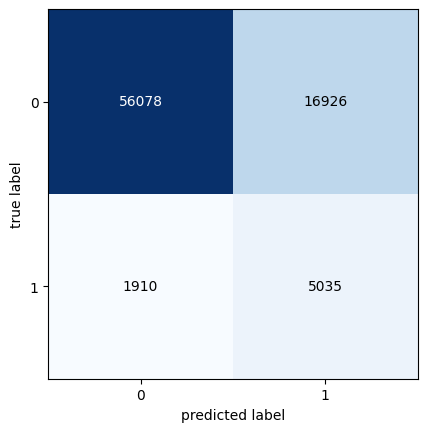

In [62]:
plot_confusion_matrix(con )


In [63]:
print (classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     73004
           1       0.23      0.72      0.35      6945

    accuracy                           0.76     79949
   macro avg       0.60      0.75      0.60     79949
weighted avg       0.90      0.76      0.81     79949



# 4) Combination of over- and under-sampling With Evaluation

In [64]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
x_ST, y_ST = smote_enn.fit_resample(x, y)
x_train7, x_test7, y_train7, y_test7 = train_test_split(x_ST, y_ST, test_size=0.25, random_state=42)
dt7=DecisionTreeClassifier()
dt7.fit(x_train7,y_train7)
print("Train Score : ",dt7.score(x_train7,y_train7)," Test Score : ",dt7.score(x_test7,y_test7))
y_pred7=dt7.predict(x_test7)
print("accuracy :" , accuracy_score(y_test7, y_pred7)*100)
print(x_train7.shape,y_train7.shape)

Train Score :  1.0  Test Score :  0.9486898839137645
accuracy : 94.86898839137645
(361798, 17) (361798,)


In [65]:
con = confusion_matrix(y_test7 , y_pred7 )
con


array([[50247,  3184],
       [ 3004, 64165]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

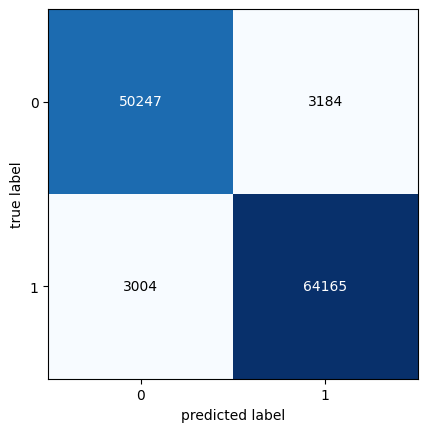

In [66]:
plot_confusion_matrix(con )


In [67]:
print (classification_report(y_test7 , y_pred7))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     53431
           1       0.95      0.96      0.95     67169

    accuracy                           0.95    120600
   macro avg       0.95      0.95      0.95    120600
weighted avg       0.95      0.95      0.95    120600



#  

In [68]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
x_SK, y_SK = smote_tomek.fit_resample(x, y)
x_train8, x_test8, y_train8, y_test8 = train_test_split(x_SK, y_SK, test_size=0.25, random_state=42)
dt8=DecisionTreeClassifier()
dt8.fit(x_train8,y_train8)
print("Train Score : ",dt8.score(x_train8,y_train8)," Test Score : ",dt8.score(x_test8,y_test8))
y_pred8=dt8.predict(x_test8)
print("accuracy :" , accuracy_score(y_test8, y_pred8)*100)
print(x_train8.shape,y_train8.shape)

Train Score :  0.9982633744288776  Test Score :  0.9208181436023954
accuracy : 92.08181436023955
(435327, 17) (435327,)


In [69]:
con = confusion_matrix(y_test8 , y_pred8 )
con

array([[66611,  6092],
       [ 5398, 67008]])

In [70]:
print (classification_report(y_test8 , y_pred8))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     72703
           1       0.92      0.93      0.92     72406

    accuracy                           0.92    145109
   macro avg       0.92      0.92      0.92    145109
weighted avg       0.92      0.92      0.92    145109



# 5) Miscellaneous samplers


## 5.1) Custom samplers

In [71]:
from imblearn import FunctionSampler


In [72]:
def func(x, y):
    return x,y
sampler = FunctionSampler(func=func)
x_C, y_C = sampler.fit_resample(x, y)
x_train9, x_test9, y_train9, y_test9 = train_test_split(x_C, y_C, test_size=0.25, random_state=42)
dt9=DecisionTreeClassifier()
dt9.fit(x_train9,y_train9)
print("Train Score : ",dt9.score(x_train9,y_train9)," Test Score : ",dt9.score(x_test9,y_test9))
y_pred9=dt9.predict(x_test9)
print("accuracy :" , accuracy_score(y_test9, y_pred9)*100)
print(x_train9.shape,y_train9.shape)

Train Score :  0.9969897350800097  Test Score :  0.8618619369848278
accuracy : 86.18619369848278
(239846, 17) (239846,)


In [73]:
con = confusion_matrix(y_test9 , y_pred9 )
con


array([[67155,  5849],
       [ 5195,  1750]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

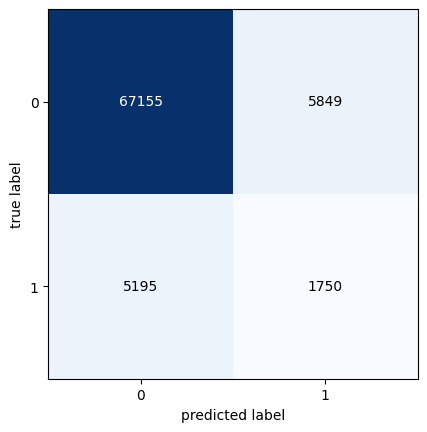

In [74]:
plot_confusion_matrix(con )


In [75]:
print (classification_report(y_test9 , y_pred9))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     73004
           1       0.23      0.25      0.24      6945

    accuracy                           0.86     79949
   macro avg       0.58      0.59      0.58     79949
weighted avg       0.87      0.86      0.86     79949



# Conclusion

## At this notebook I use alot of techniques to convert imbalanced data to balanced with high accuracy i find Over sampling classifier has high accuracy = 95.26% where data is imbalanced has accuracy = 91.31%.

### accuracy without handling imbalanced data = 91.31 %

### accuracy with handling imbalanced data by use oversampling = 95.26 %
#### - accuracy with handling imbalanced data by use smote oversampling = 91.4 %
#### - accuracy with handling imbalanced data by use ADASYN oversampling = 91.58 %

### accuracy with handling imbalanced data by use undersampling = 67 %
#### - accuracy with handling imbalanced data by use Near Miss undersampling = 84.25 %

###  Ensemble learning sampling 
#### - accuracy with handling imbalanced data by use Bagging = 90.25 %
#### - accuracy with handling imbalanced data by use Boosting = 74.83 %
#### - accuracy with handling imbalanced data by use Forest of random = 76.43 %

###  Combination of over and under sampling
#### - accuracy with handling imbalanced data by use SMOTEENN = 94.86%
#### - accuracy with handling imbalanced data by use SMOTETOMEK = 92.08 %

###  Miscellaneous samplers
#### - accuracy with handling imbalanced data by use Customsamplers = 86.186 %


# High Accuracy is 95.26%

# Thanks!